# Draw the distribution chart for the emotional scores
Read the SAM scores and dynamic annotations and plot the valence/arousal distribution chart using matplotlib and seaborn.

Input: 
- SAM scores file `REFED-dataset/SAM_score.csv`.
- Dynamic annotations folder `REFED-dataset/annotations/`.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from load_REFED import load_label

In [2]:
path_annotation = './REFED-dataset/annotations'
path_SAM = './REFED-dataset/SAM_score.csv'

### Read SAM scores and Dynamic annotations

In [3]:
SAM_score = pd.read_csv(path_SAM) # Load SAM scores from CSV file

label_all = load_label(path_annotation) # Load dynamic annotations using custom function
Dynamic_Valence = [np.array([label_all['s%d'%si]['v%d'%vi]['Valence'] for si in range(1, 33)])/256 for vi in range(1, 16)]
Dynamic_Arousal = [np.array([label_all['s%d'%si]['v%d'%vi]['Arousal'] for si in range(1, 33)])/256 for vi in range(1, 16)]

### Draw distribution chart using violin plot

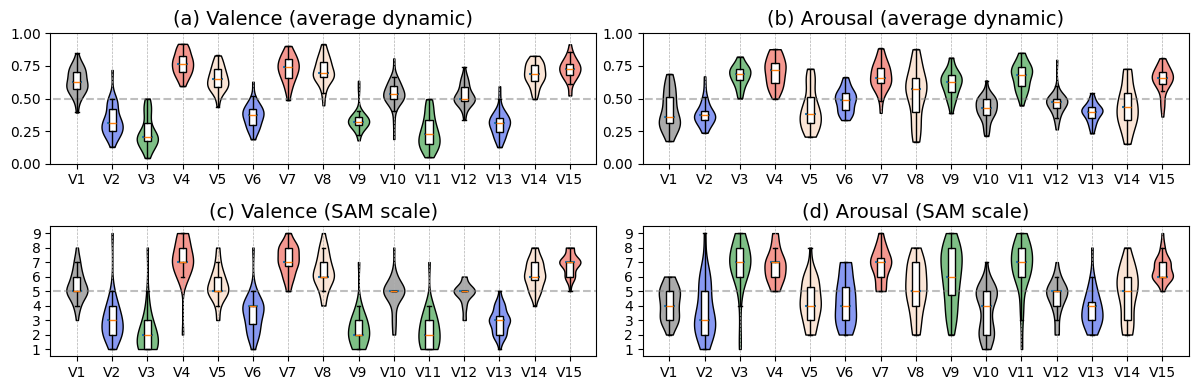

In [5]:
all_mean_valence = np.array([Dynamic_Valence[i].mean(1) for i in range(15)]).T
all_mean_arousal = np.array([Dynamic_Arousal[i].mean(1) for i in range(15)]).T

all_mean_valence_SAM = np.array([SAM_score['Video_%d_Valence'%(i+1)] for i in range(15)]).T
all_mean_arousal_SAM = np.array([SAM_score['Video_%d_Arousal'%(i+1)] for i in range(15)]).T

color = ['#aaaaaa', '#8899f2', '#7ebf86', '#f59890', '#fbe5d6', '#8899f2', '#f59890', '#fbe5d6', '#7ebf86', '#aaaaaa', '#7ebf86', '#aaaaaa', '#8899f2', '#fbe5d6', '#f59890']

'''
Plot violin plots for valence and arousal (dynamic and SAM)
'''
plt.figure(figsize=(12,4))

plt.subplot(2,2,1)
plt.hlines(0.5, 0, 16, 'gray', 'dashed', alpha=0.5)
fig = plt.violinplot(all_mean_valence, showextrema=False, showmedians=True, widths=0.6)
bp = plt.boxplot(all_mean_valence, widths=0.2, patch_artist=True, sym=',')
for i, pc in enumerate(fig['bodies']):
    pc.set_facecolor(color[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
for patch in bp['boxes']:
    patch.set_facecolor('white')
plt.ylim(0,1)
plt.xlim(0.25,15.75)
plt.xticks(np.arange(15)+1, ['V%d'%vidx for vidx in np.arange(15)+1])
plt.grid(axis='x', linewidth=0.5, linestyle='--')
plt.title('(a) Valence (average dynamic)', fontsize=14)

plt.subplot(2,2,2)
plt.hlines(0.5, 0, 16, 'gray', 'dashed', alpha=0.5)
fig = plt.violinplot(all_mean_arousal, showextrema=False, showmedians=True, widths=0.6)
bp = plt.boxplot(all_mean_arousal, widths=0.2, patch_artist=True, sym=',')
plt.ylim(0,1)
plt.xlim(0.25,15.75)
for i, pc in enumerate(fig['bodies']):
    pc.set_facecolor(color[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
for patch in bp['boxes']:
    patch.set_facecolor('white')
plt.xticks(np.arange(15)+1, ['V%d'%vidx for vidx in np.arange(15)+1])
plt.grid(axis='x', linewidth=0.5, linestyle='--')
plt.title('(b) Arousal (average dynamic)', fontsize=14)

plt.subplot(2,2,3)
plt.hlines(5, 0, 16, 'gray', 'dashed', alpha=0.5)
fig = plt.violinplot(all_mean_valence_SAM, showextrema=False, showmedians=True, widths=0.6)
bp = plt.boxplot(all_mean_valence_SAM, widths=0.2, patch_artist=True, sym=',')
for i, pc in enumerate(fig['bodies']):
    pc.set_facecolor(color[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
for patch in bp['boxes']:
    patch.set_facecolor('white')
plt.ylim(0.5,9.5)
plt.xlim(0.25,15.75)
plt.yticks(np.arange(9)+1)
plt.xticks(np.arange(15)+1, ['V%d'%vidx for vidx in np.arange(15)+1])
plt.grid(axis='x', linewidth=0.5, linestyle='--')
plt.title('(c) Valence (SAM scale)', fontsize=14)

plt.subplot(2,2,4)
plt.hlines(5, 0, 16, 'gray', 'dashed', alpha=0.5)
fig = plt.violinplot(all_mean_arousal_SAM, showextrema=False, showmedians=True, widths=0.6)
bp = plt.boxplot(all_mean_arousal_SAM, widths=0.2, patch_artist=True, sym=',')
plt.ylim(0.5,9.5)
plt.xlim(0.25,15.75)
for i, pc in enumerate(fig['bodies']):
    pc.set_facecolor(color[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
for patch in bp['boxes']:
    patch.set_facecolor('white')
plt.xticks(np.arange(15)+1)
plt.yticks(np.arange(9)+1)
plt.xticks(np.arange(15)+1, ['V%d'%vidx for vidx in np.arange(15)+1])
plt.grid(axis='x', linewidth=0.5, linestyle='--')
plt.title('(d) Arousal (SAM scale)', fontsize=14)

plt.tight_layout()

# plt.savefig('SAM_scores_violins.png')